In [1]:
import numpy as np
from ppclass import pp
%matplotlib inline

In [2]:
ini = pp(quiet=True)
ini.file = "/home/aspiga/data/TITAN_LES/HF1.1/wrfout_d01_9999-01-01_11:06:40"
ini.useindex = "1111"
ini.colorbar = "seismic"
ini.xp,ini.yp = 16,12
ini.res = 600
#ini.xp,ini.yp = 4,3 ## vignettes for quick views

## Vertical section

In [3]:
ver = pp() ; ver << ini
ver.x,ver.t = 50,12
ver.xcoeff = 50./1000. ; ver.xlabel = "Horizontal coordinate (km)"
ver.ycoeff = 100./1000. ; ver.ylabel = "Vertical coordinate (km)"
ver.filename = "vertsec"

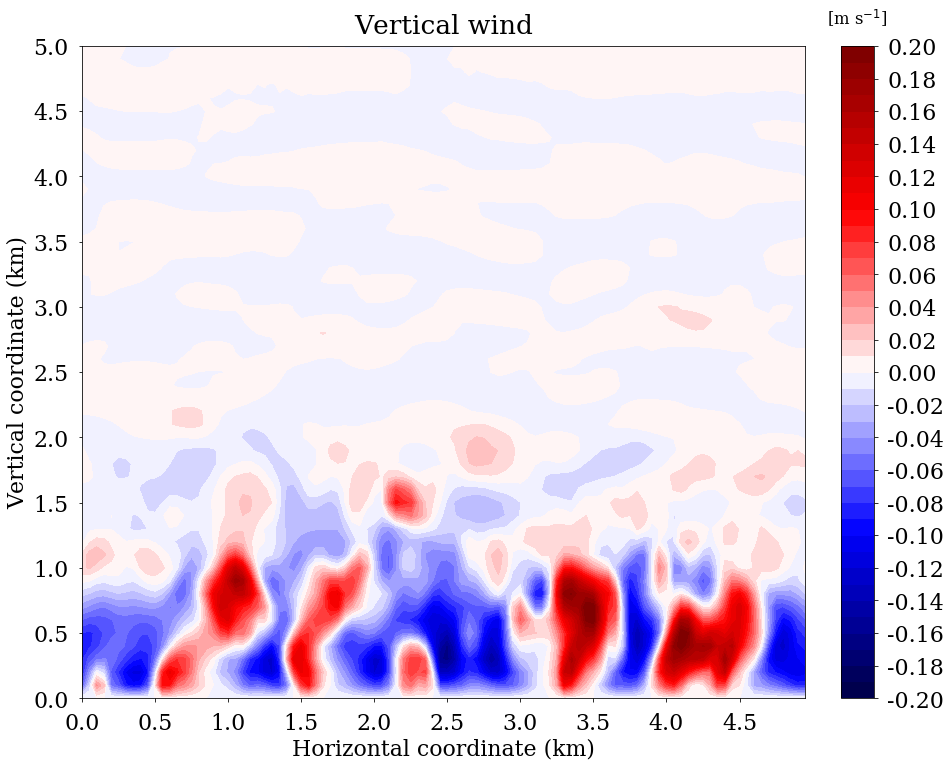

In [4]:
w = pp() ; w << ver ; w.var = "W" ; w.title = "Vertical wind"
w.vmin,w.vmax,w.div,w.fmt = -0.2,+0.2,40,"%.2f"
foo = w.getplot() ; w.out = "png" ; w.filename = w.filename+w.var[0] ; foo = w.plot()

Below we create a movie of turbulent convection

In [5]:
if 0 == 1:
    for ttt in range(99):
        w.t = ttt
        w.out = "png"
        w.filename = "W%03d" % (ttt)
        w.getplot()
    !mencoder -mc 0 -noskip -skiplimit 0 -ovc lavc -lavcopts vcodec=msmpeg4v2:vhq "mf://*.png" -mf type=png:fps=18 -o output.avi > output.log 2>&1

## Horizontal section

In [6]:
hor = pp() ; hor << ini
hor.t = 12
hor.xcoeff = 50./1000. ; hor.xlabel = "Horizontal coordinate (km)"
hor.ycoeff = 50./1000. ; hor.ylabel = "Horizontal coordinate (km)"
hor.filename = "horimap"

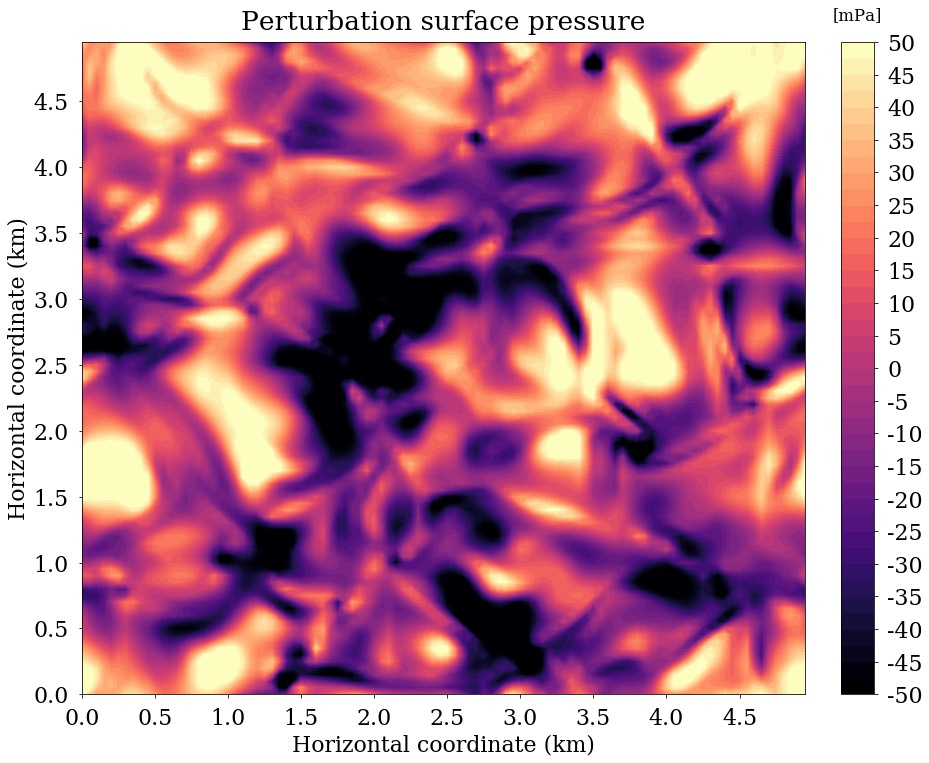

In [7]:
mp = pp() ; mp << hor ; mp.var = "PSFC" 
mp.get() ; mp = mp - np.mean(mp.f) ; mp.title = "Perturbation surface pressure"
mp = mp*1000.
mp.colorbar = "magma"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -50,+50,40,"%.0f","mPa"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.vmin) ; foo = mp.plot()

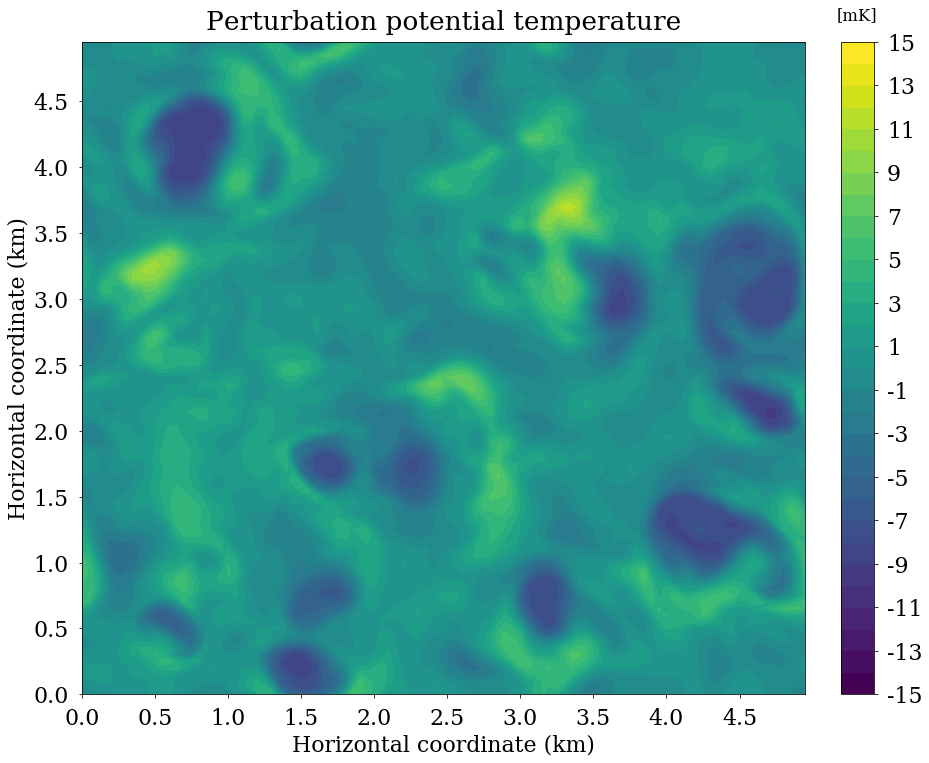

In [8]:
mp = pp() ; mp << hor ; mp.var = "T" 
mp.z = 12
mp.get() ; mp = mp - np.mean(mp.f) ; mp.title = "Perturbation potential temperature"
mp = mp*1000.
mp.colorbar = "viridis"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -15,+15,30,"%.0f","mK"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

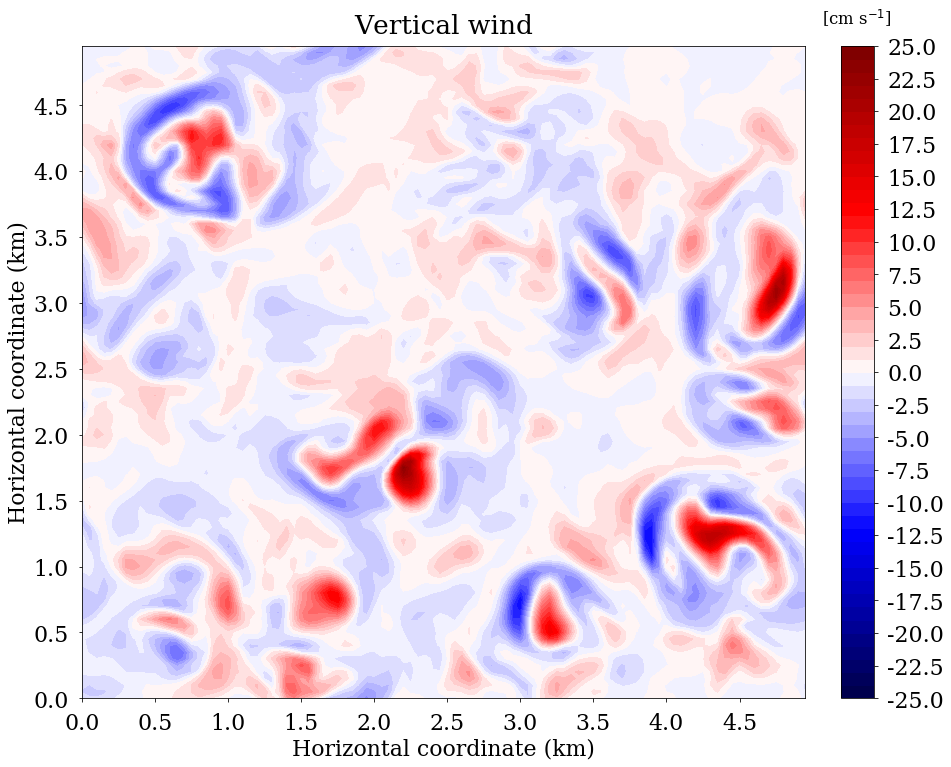

In [9]:
mp = pp() ; mp << hor ; mp.var = "W" ; mp.title = "Vertical wind"
mp.z = 12
mp.get() ; mp = mp*100.
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -25,+25,50,"%.1f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

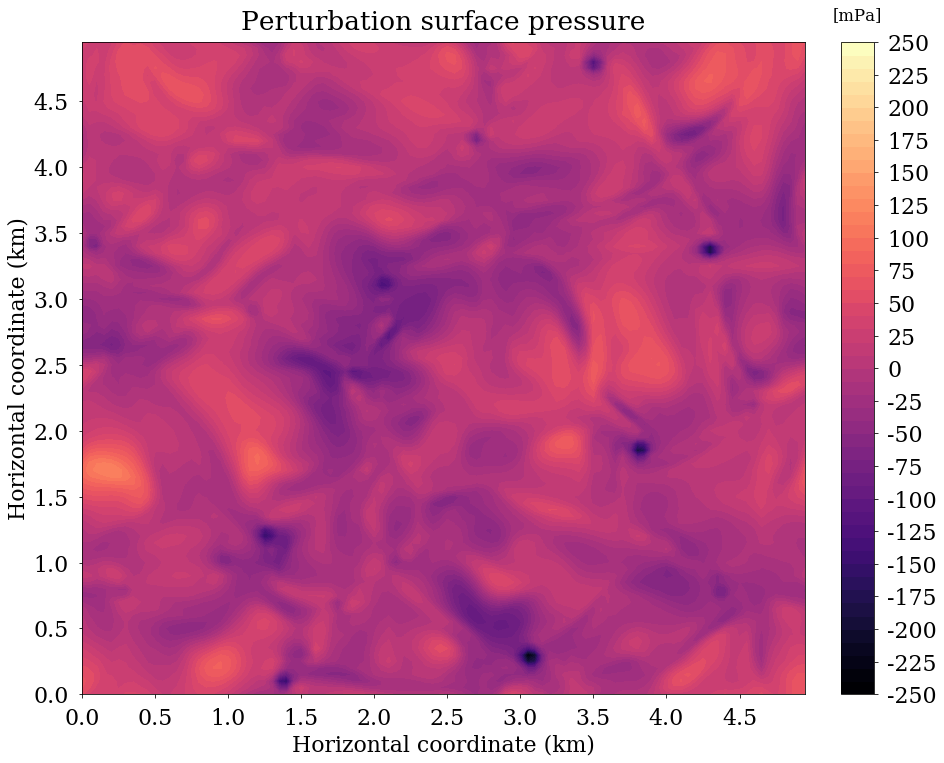

In [10]:
mp = pp() ; mp << hor ; mp.var = "PSFC" 
mp.get() ; mp = mp - np.mean(mp.f) ; mp.title = "Perturbation surface pressure"
mp = mp*1000.
mp.colorbar = "magma"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -250,+250,50,"%.0f","mPa"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.vmin) ; foo = mp.plot()

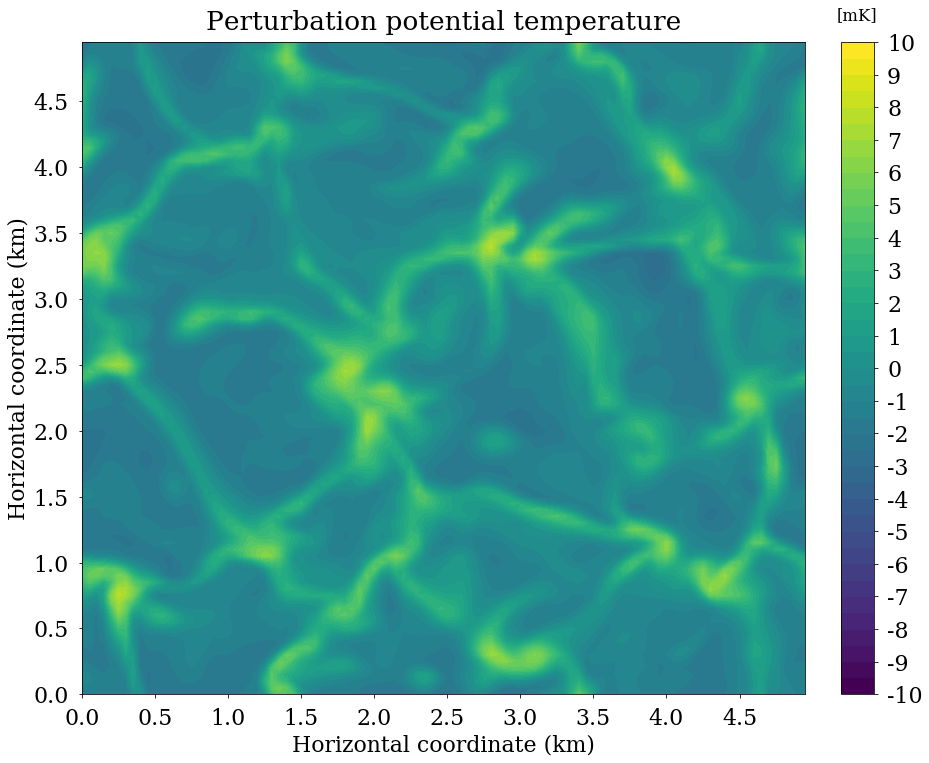

In [11]:
mp = pp() ; mp << hor ; mp.var = "T" 
mp.z = 2
mp.get() ; mp = mp - np.mean(mp.f) ; mp.title = "Perturbation potential temperature"
mp = mp*1000.
mp.colorbar = "viridis"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -10,+10,40,"%.0f","mK"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

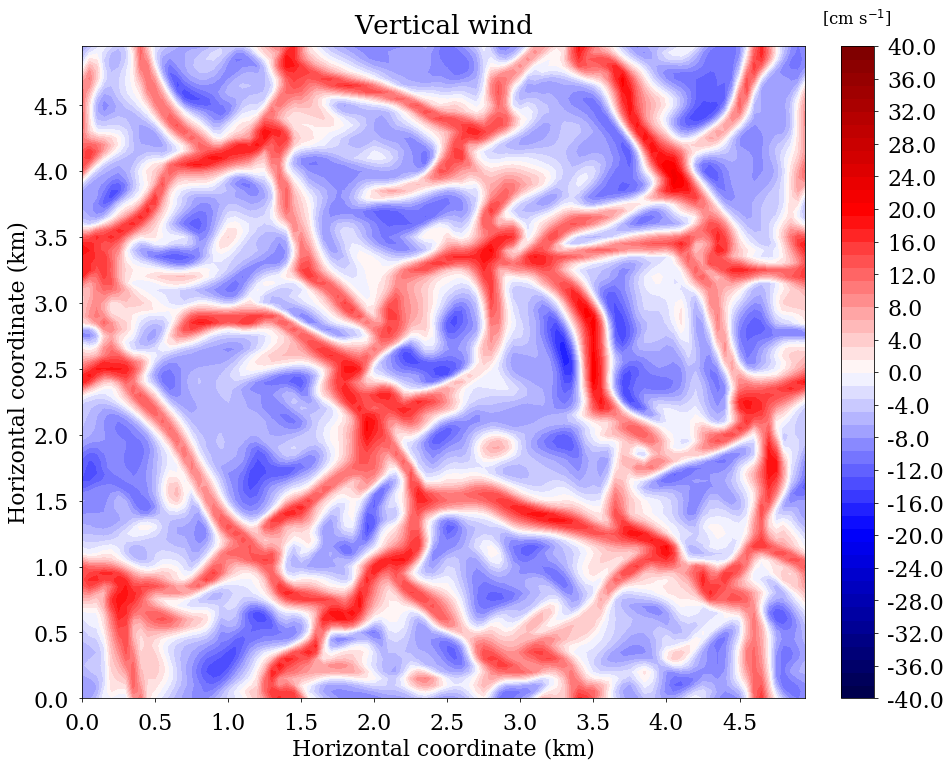

In [12]:
mp = pp() ; mp << hor ; mp.var = "W" ; mp.title = "Vertical wind"
mp.z = 2
mp.get() ; mp = mp*100.
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -40,+40,50,"%.1f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

## Profile

In [13]:
cp = pp() ; cp << ini
cp.t = 12
cp.y = 6
cp.xcoeff = 50./1000. ; cp.xlabel = "Horizontal coordinate (km)"
cp.filename = "coupe"

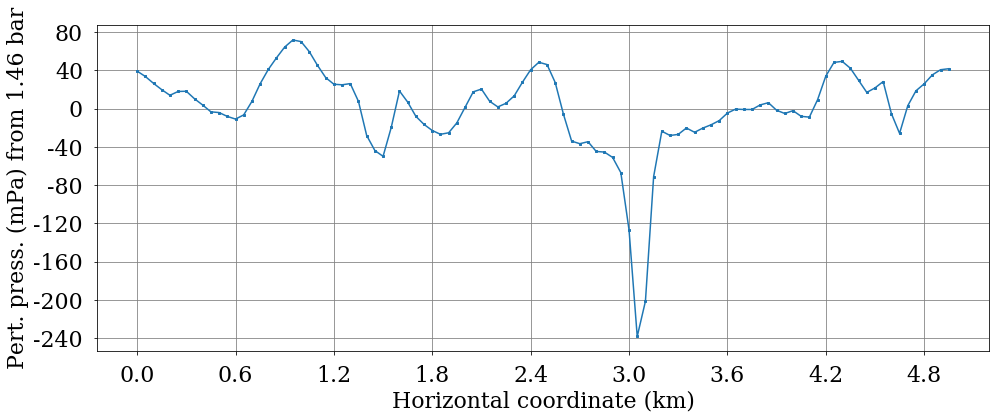

In [14]:
dp = pp() ; dp << cp ; dp.var = "PSFC"
dp.xp,dp.yp = 16,6
dp.marker = "s" ; dp.fmt = "%.2f"
dp.get()

fff = np.mean(dp.f)
dp = (dp - fff)*1000.
dp.ylabel = "Pert. press. (mPa) from %.2f bar" % (fff/1e5) 
dp.fmt = "%.0f"

foo = dp.plot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

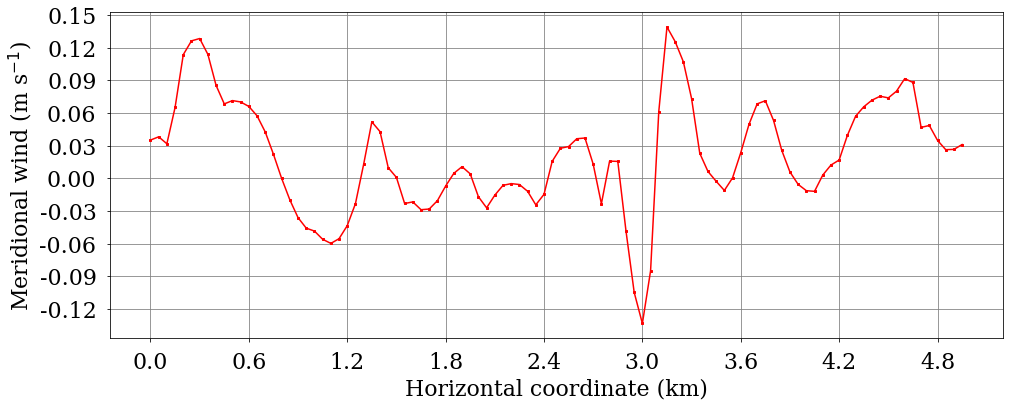

In [15]:
dp = pp() ; dp << cp ; dp.var = "V"
dp.xp,dp.yp = 16,6
dp.z = 1
dp.marker = "s" ; dp.fmt = "%.2f" ; dp.color = 'r'
foo = dp.getplot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

## Later

In [16]:
ini.file = "/home/aspiga/data/TITAN_LES/HF1.1/wrfout_d01_9999-01-12_02:40:00"

In [17]:
ver = pp() ; ver << ini
ver.x,ver.t = 55,67
ver.xcoeff = 50./1000. ; ver.xlabel = "Horizontal coordinate (km)"
ver.ycoeff = 100./1000. ; ver.ylabel = "Vertical coordinate (km)"
ver.filename = "later_"+"vertsec"

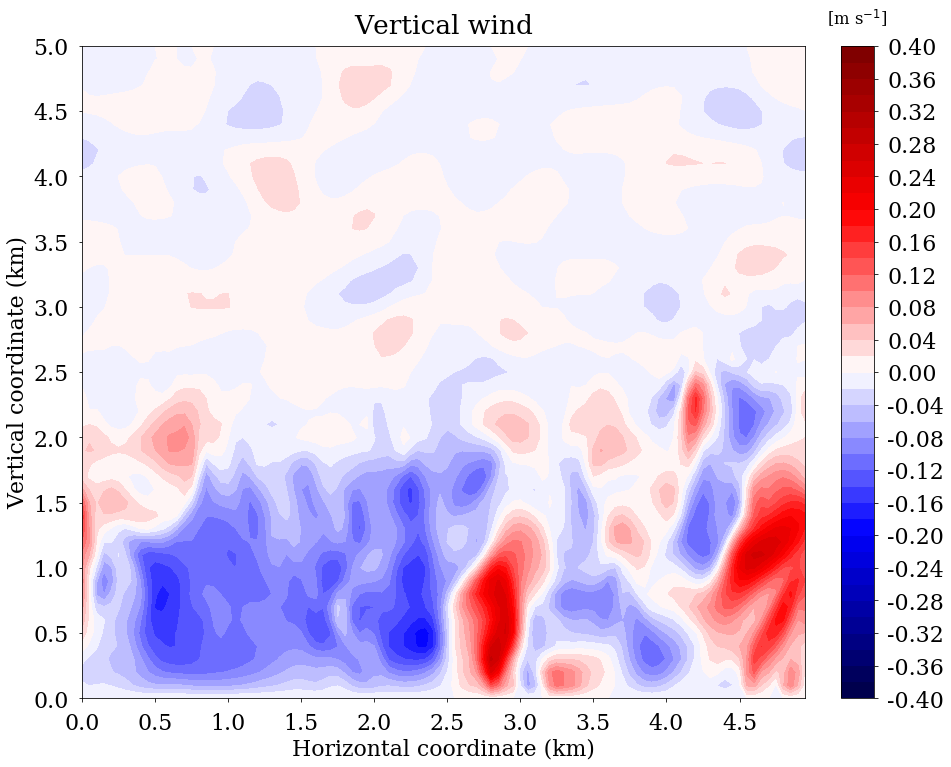

In [18]:
w = pp() ; w << ver ; w.var = "W" ; w.title = "Vertical wind"
w.vmin,w.vmax,w.div,w.fmt = -0.4,+0.4,40,"%.2f"
foo = w.getplot() ; w.out = "png" ; w.filename = w.filename+w.var[0] ; foo = w.plot()

In [19]:
hor = pp() ; hor << ini
hor.t = 67
hor.xcoeff = 50./1000. ; hor.xlabel = "Horizontal coordinate (km)"
hor.ycoeff = 50./1000. ; hor.ylabel = "Horizontal coordinate (km)"
hor.filename = "horimap"

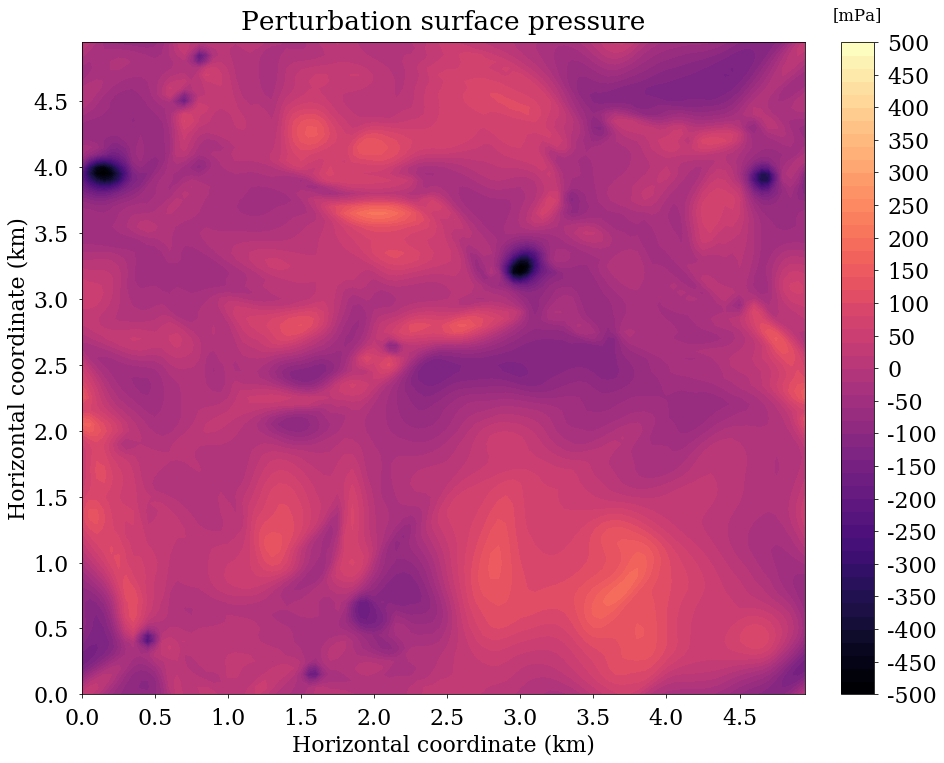

In [20]:
mp = pp() ; mp << hor ; mp.var = "PSFC" 
mp.get() ; mp = mp - np.mean(mp.f) ; mp.title = "Perturbation surface pressure"
mp = mp*1000.
mp.colorbar = "magma"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -500,+500,50,"%.0f","mPa"
foo = mp.plot() ; mp.out = "png" ; mp.filename = "later_"+mp.filename+mp.var[0]+str(mp.vmin) ; foo = mp.plot()

In [21]:
cp = pp() ; cp << ini
cp.y = 64
cp.t = 67
cp.xcoeff = 50./1000. ; cp.xlabel = "Horizontal coordinate (km)"
cp.filename = "later_coupe"

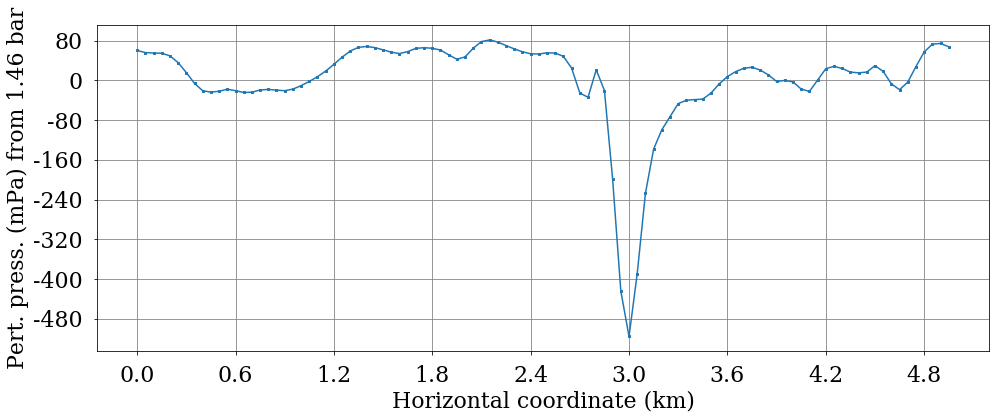

In [22]:
dp = pp() ; dp << cp ; dp.var = "PSFC"
dp.xp,dp.yp = 16,6
dp.marker = "s" ; dp.fmt = "%.2f"
dp.get()

fff = np.mean(dp.f)
dp = (dp - fff)*1000.
dp.ylabel = "Pert. press. (mPa) from %.2f bar" % (fff/1e5) 
dp.fmt = "%.0f"

foo = dp.plot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

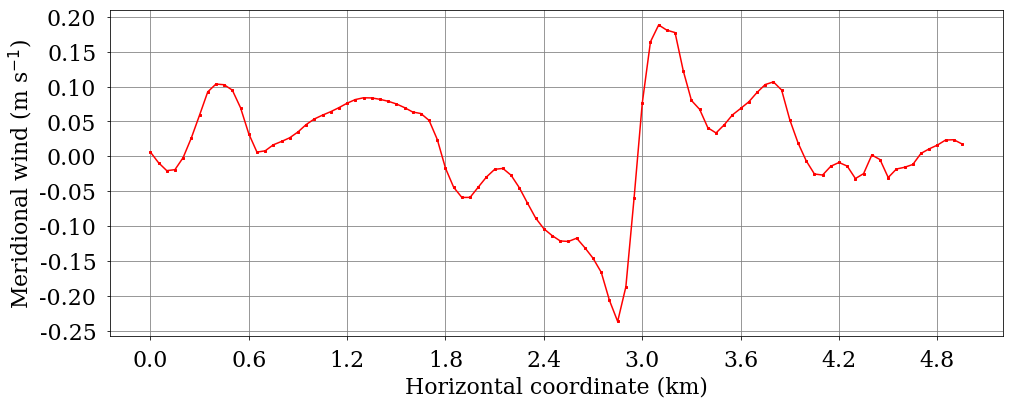

In [23]:
dp = pp() ; dp << cp ; dp.var = "V"
dp.xp,dp.yp = 16,6
dp.z = 1
dp.marker = "s" ; dp.fmt = "%.2f" ; dp.color = 'r'
foo = dp.getplot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()